In [1]:
#This first cell contains the major imports, It should be run at every new kernel sessions
import time
import random
import  glob
import numpy as np
import h5py
from  PIL import  Image as Img
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
IMG_DIM = 32

In [1]:
#Reading the datset for trianing
start_time = time.time()
classes = list()  ## To denote the alphanumeric classes [0-9A-Z]
images = list()
global_counter = 0 ## Just to count the total number of images


def read_images_helper(c):
    current_time = time.time()
    global global_counter
    classes.append(c)
    index = classes.index(c)
    path =  'H:/G Drive 34GB/MajorProject/DataSet/Train/'+c+'/*.jpg' # path to the Dataset
    i = 0
    print('Reading Images For:', c)
    for filename in glob.glob(path):
        im = Img.open(filename)
        temp = np.array(list(im.getdata()))
        #temp = (temp)/255
        #temp = np.around(temp, 4)
        images.append([temp, index])
        i += 1
    global_counter += i
    print("{} of raw images were found for '{}'".format(i,c))
    print("Time taken to read {} images :{}\n".format(i, time.strftime("%H:%M:%S", time.gmtime(time.time()-current_time))))

In [2]:
from string import ascii_uppercase

for i in range(10):
    read_images_helper(str(i))
for c in ascii_uppercase:
    read_images_helper(c)
print("Total time elapsed:", time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time)))
print("Total Images Found:", global_counter)

Reading Images For: 0
65504 of raw images were found for '0'
Time taken to read 65504 images :00:08:11

Reading Images For: 1
43773 of raw images were found for '1'
Time taken to read 43773 images :00:04:51

Reading Images For: 2
39351 of raw images were found for '2'
Time taken to read 39351 images :00:04:21

Reading Images For: 3
39996 of raw images were found for '3'
Time taken to read 39996 images :00:04:14

Reading Images For: 4
38112 of raw images were found for '4'
Time taken to read 38112 images :00:04:04

Reading Images For: 5
32317 of raw images were found for '5'
Time taken to read 32317 images :00:03:59

Reading Images For: 6
38879 of raw images were found for '6'
Time taken to read 38879 images :00:04:47

Reading Images For: 7
41080 of raw images were found for '7'
Time taken to read 41080 images :00:05:04

Reading Images For: 8
38795 of raw images were found for '8'
Time taken to read 38795 images :00:04:43

Reading Images For: 9
38319 of raw images were found for '9'
Tim

In [3]:
print("Total Raw Images Read: ", global_counter)
print("Shuffling all the images")
random.shuffle(images)        #Suffling the images to make trainig efficient
print("Writing The Image Data To A File\n")
write_time= time.time()
np.save('train_data.npy', images)    #Saving the pixel values so that it can be used later without the need for re-reading all images from the directory
print("Time taken to write the file:", time.strftime("%H:%M:%S", time.gmtime(time.time()-write_time)))
print("Writing The Image Classes And Indexes To A File")
with open('train_category.txt', 'w') as file:    #The file will store the classes for prediction i.e. 0-9 and A-Z
    for c in classes:
        file.write(str(classes.index(c))+';'+c+'\n')


Total Raw Images Read:  751228
Shuffling all the images
Writing The Image Data To A File

Time taken to write the file: 01:45:24
Writing The Image Classes And Indexes To A File


In [2]:
'''Now the training data is in the variable classes
The training data can even be loaded from the file train_data.npy saved in previous cell uncommenting the following
'''
#images = np.load('train_data.npy', allow_pickle=True)

#Next, we need to normalize the pixel values in the image from the range[0,255] to [0,1] 
#Let's first see how the data has been organized
np.array(images).shape

(751228, 2)

In [3]:
'''The data shape(751228,2) indicates that there are 751228 images with 2 values for each of the images
The first value is the value of image pixel, and the second value denotes the image label
Let's see how the very first image in the datset looks like. (Remember: the data has been suffled so the first image 
may not be what we read first)
'''


#Let's see  the shape of an image
print(np.array(images[0][0]).shape)

(1024,)


In [4]:
#shape(1024,) denotes that it's 1D array with 1024 values i.e. 32X32
#Each of the images are 32X32 in size and the images are saved in 1D array
#Let's see what both the values look  like in each of the rows in image tensor
print('Image Pixel:')
print(np.array(images[0][0]))
print('Image Label:')
print(images[0][1])

Image Pixel:
[0 4 0 ... 0 0 0]
Image Label:
1


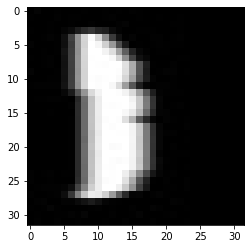

In [5]:
#Label 1 indicates the digit 1. That 1 denotes the index in the file category.txt which maps to 1
#Let's see how the first image looks like
first_image = np.array(images[0][0]).reshape(IMG_DIM, IMG_DIM)
plt.imshow(Img.fromarray(first_image))

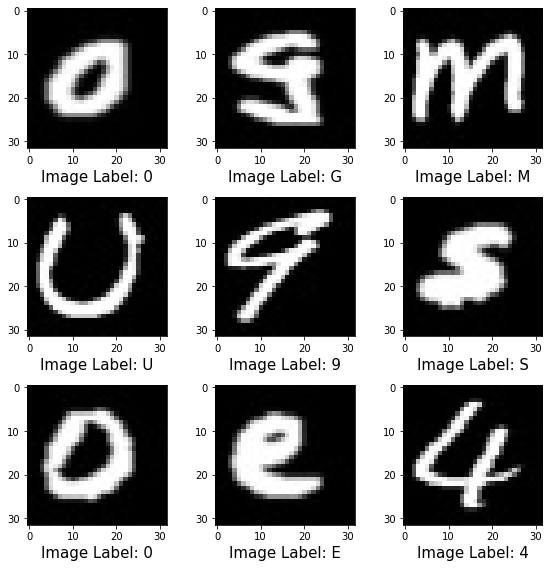

In [52]:
#Let's plot some images to get the idea of what the data actually looks like
#Uncomment the random.seed(13) to pick same random images everytime
#random.seed(13)
fig=plt.figure(figsize=(8,8))
row = 3
col = 3
axes = list() 
for i in range(row*col):
    random_index = random.randint(0,751228)
    sample_image = np.array(images[random_index][0]).reshape(IMG_DIM, IMG_DIM)
    Label = str(classes[images[random_index][1]])
    axes.append( fig.add_subplot(row, col, i+1) )
    x_label=("Image Label: "+Label)
    axes[-1].set_xlabel(x_label, fontsize=15)  
    plt.imshow(Img.fromarray(sample_image))
fig.tight_layout()   

In [3]:
#Okay, Let's split the data into train_variable and target_variable
#Train_varaible is going to be input image and target_variable is the image label
train_variable = images[:,0]
target_variable = images[:,1]

In [4]:
'''Next we're going to convert each from 1D array of size 1024 to 2D array of size 32X32 (Remember:32*32=1024)
Since we're going  to implement convolutional neural network, input data needs to be 4D tensor of shape(n,h,w,c)
where n denotes total number of inputs
h,w denote the image dimensions i.e. 32,32
c denotes number of channel = 1 for black and white images
'''


start_time =time.time()
train_variable_reshaped = [x for x in train_variable]
train_variable_reshaped = np.reshape(train_variable_reshaped, newshape=(-1, 32, 32, 1))
#The pixel values contained in train_variable for eachc image ranges [0,255]
#We need to normalize it to the range [0,1] as a part of preprocessing
train_variable_reshaped = np.around(train_variable_reshaped/255, 4)
train_variable_reshaped = np.around(train_variable_reshaped, 4)
print("Time taken for preprocessing:", time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time)))

Time taken for preprocessing: 00:30:28


In [11]:
#Let's free up the memory occupied by unused data variable
train_varaible = None
images = None
classes = None
del train_variable
del images
del classes

In [19]:
#Saving the target variable so it might be used later without the need for repeating previous tasks
np.save('target_data.npy', target_variable)

In [28]:
#Let's convert the target variable too from list to numpy array
target_variable = np.array(target_variable)

In [29]:
type(target_variable)

numpy.ndarray

In [13]:
'''Enough working with the input data, Now Let's move one step further to implement the model:
Let's first understand the architecture of our model
The first layer is going to be a convolutional layer having 16 kernels of size(5,5) with relu activation and padding as same
The second layer is MaxPooling Layer with poolsize (2,2)
The 3rd Layer is Convolutional layer with 64 Kernels of size(5,5) with activation as relu and padding as same
The 4th layer consists of MaxPooling Layer again with poolsize (2,2)
The output from the 4th layer is flattened
The flattened output goes to a dense layer with 1000 neurons
Finally there is a Dense layer with 36 neurons, each representing one class label. 
The softmax activation has been used to get probability distribution
'''
#There are 16 kernels of shape(5,5) at the first convolution layer and
#64 kernels of shape(5,5) at the second convolution layer
#Each of the kernel from first layer followed by maxpooling is convolved with 64 kernels at the second layer
#Thus there are actually 16+16x64 kernels in total
#The first Conv layer has 16 biases for 16 kernels and 
#second Conv layer has 64 biases for 64 kernels
#So, the total number of trainable parameters for the first Conv layer = 16*5*5 + 16 = 416
#Total number of trainable parameters for the 2nd Conv layer = 16*64*5*5 + 64 = 25664
#Also the input image is of shape 32x32x1, the output from first Maxpooling layer has shape of 16x16x1
#And the output from second conv layer has shape of 8x8x1
#There are Total 64*8*8*1 outputs from the second Maxpool layer
#So the flatten layer will have 4096 Neurons
#The first fully connected dense layer has 1000 Neurons ans 4096 outputs
#So the total learnable parameters at first Dense layer = (weights=4096*1000) + (biases=1000) = 4,097,000
#The second Second has 36 Neurons and 1000 inputs from first dense layer
#So, the total learnable parameters at the 2nd Dense Layer = (weights=36*1000) + (biases=36) = 36036
#Hence, total parameters needed to be learned = 416 +25664 +4097000 +3036 =4,159,116
#Finally there is a dense layer with softmax activation
#It basically doesn't have any learnable parameters. It's there to convert the ouput int the form of probability distribution
#In other words, we're just applying Softmax activation at the output. Softmax = e(xi)/e(sum(x))


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

#Model Definition
model = Sequential()
model.add(Conv2D(16, (5, 5), padding="same", input_shape=(32, 32, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000))
model.add(Dense(36))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#Let's print the model summary to conform the layers and the number of trainable parameters!
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        25664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              4097000   
_________________________________________________________________
dense_1 (Dense)              (None, 36)                3

In [30]:
#Fitting the data to the model
#85% of data is going to be used for training and remaining 15% for validation 
#Actual Training Begins Now
start_time= time.time()
history = model.fit(train_variable_reshaped, target_variable, batch_size=256, validation_split=0.15, epochs=50)
print('Total time elapsed for training:', time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time)))

Epoch 1/50
2495/2495 [==============================] - 1288s 516ms/step - loss: 0.2627 - accuracy: 0.9155 - val_loss: 0.2018 - val_accuracy: 0.9329
Epoch 2/50
2495/2495 [==============================] - 961s 385ms/step - loss: 0.1876 - accuracy: 0.9369 - val_loss: 0.1874 - val_accuracy: 0.9364
Epoch 3/50
2495/2495 [==============================] - 896s 359ms/step - loss: 0.1724 - accuracy: 0.9410 - val_loss: 0.1840 - val_accuracy: 0.9378
Epoch 4/50
2495/2495 [==============================] - 895s 359ms/step - loss: 0.1624 - accuracy: 0.9437 - val_loss: 0.1791 - val_accuracy: 0.9407
Epoch 5/50
2495/2495 [==============================] - 906s 363ms/step - loss: 0.1538 - accuracy: 0.9463 - val_loss: 0.1817 - val_accuracy: 0.9404
Epoch 6/50
2495/2495 [==============================] - 894s 358ms/step - loss: 0.1479 - accuracy: 0.9475 - val_loss: 0.1789 - val_accuracy: 0.9404
Epoch 7/50
2495/2495 [==============================] - 890s 357ms/step - loss: 0.1429 - accuracy: 0.9490 - val

In [31]:
#Saving the model and the weights so that they can be used later without the need to re-train
start_time = time.time()

#Saving the model configuration in json file format
model_json = model.to_json()
with open("Trained_model.json", "w") as json_file:
    json_file.write(model_json)     
    
# saving the trained weights in HDF5 file format
model.save_weights("Learned_weights.h5") 

print("Total time taken for saving the model and the weights:", time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time)))

Total time taken for saving the model and the weights: 00:00:08


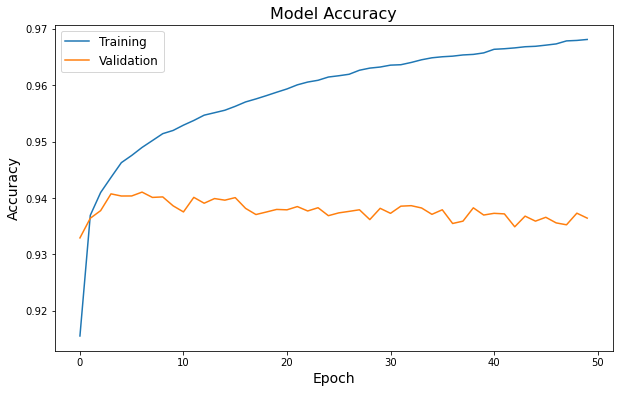

In [36]:
#Let's plot the  model accuracies and losses
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training', 'Validation'], loc='upper left', fontsize=12)

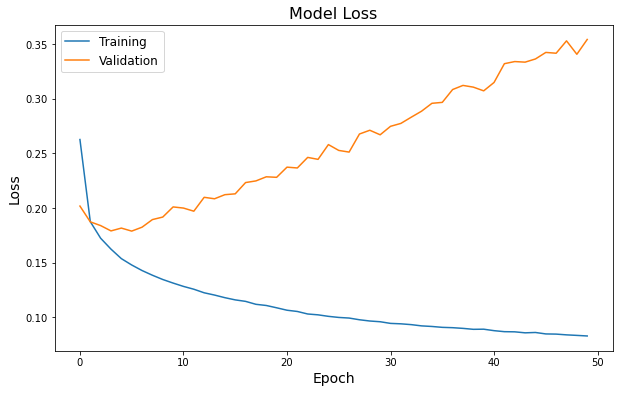

In [37]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training', 'Validation'], loc='upper left', fontsize=12)

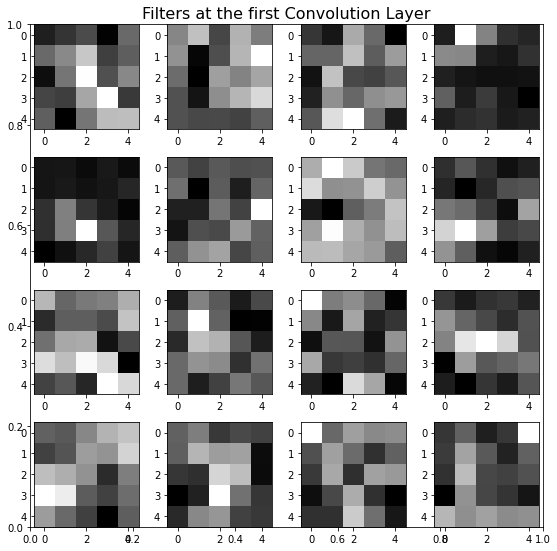

In [50]:
#Lets Visualize how the kernels at convolutional layer looks like after training
#Let's first see the 16 kernels from the 1st convolution layer
import h5py
layer1_filters = []
with h5py.File('Learned_weights.h5', 'r') as weights:
    for each in weights['conv2d']['conv2d']['kernel:0']:
        layer1_filters.append(np.array(each))
layer1_filters = np.array(layer1_filters)
layer1_filters = layer1_filters.transpose([3, 0, 1, 2])

fig=plt.figure(figsize=(8,8))
plt.title("Filters at the first Convolution Layer", fontsize=16)
row = 4
col = 4
axes = list() 
for i in range(row*col):
    filter_i = layer1_filters[i].reshape(5, 5)
    axes.append( fig.add_subplot(row, col, i+1) ) 
    plt.imshow(filter_i, cmap='binary')
fig.tight_layout()   

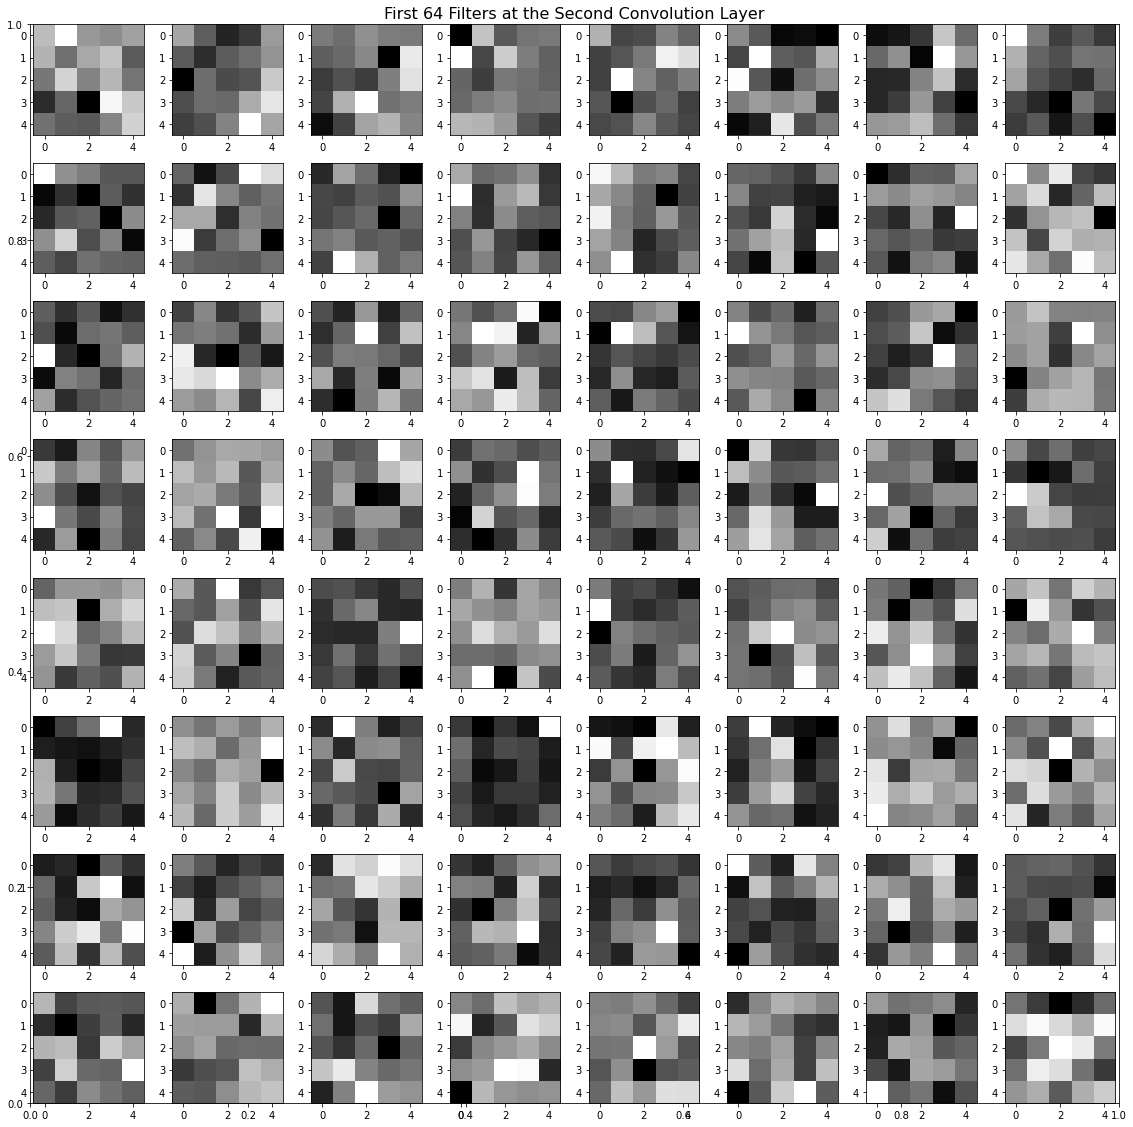

In [53]:
#Let's Visualize the first 64 filters at the Second convolutional Layer:
layer2_filters = []
with h5py.File('Learned_weights.h5', 'r') as weights:
    for each in weights['conv2d_1']['conv2d_1']['kernel:0']:
        layer2_filters.append(np.array(each))
layer2_filters = np.array(layer2_filters)
layer2_filters = layer2_filters.transpose([2, 3, 0, 1])
layer2_filter_first = layer2_filters[0]
layer2_filter_first = layer2_filter_first.reshape(64, 5, 5)
fig=plt.figure(figsize=(16,16))
plt.title("First 64 Filters at the Second Convolution Layer", fontsize=16)
row = 8
col = 8
axes = list() 
for i in range(row*col):
    filter_i = layer2_filter_first[i].reshape(5, 5)
    axes.append( fig.add_subplot(row, col, i+1) ) 
    plt.imshow(filter_i, cmap='binary')
fig.tight_layout()   

In [54]:
#Now Let's test the model against the test data
#The test data will be read the way train data was read and preprcossed
#Remember: We could just define a single function to read and preprocess both the training and testing data
#For now, due to kernel deadlock, I'm doing it seperately..
### Reading the datset for testing
start_time = time.time()
test_labels = list()  ## To denote the alphanumeric classes [0-9a-zA-Z]
test_images = list()
global_counter = 0 ## Just to count the number of images


def read_test_images(c):
    global global_counter
    test_labels.append(c)
    index = test_labels.index(c)
    path =  'H:/G Drive 34GB/MajorProject/DataSet/Test/'+c+'/*.jpg' # path to the Dataset
    i = 0
    print('Reading Images For:', c)
    for filename in glob.glob(path):
        im = Img.open(filename)
        temp = np.array(list(im.getdata()))
        #temp = (255-temp)/255
        #temp = np.around(temp, 4)
        test_images.append([temp, index])
        i += 1
    global_counter += i
    print("{} of raw images were found for '{}'".format(i,c))

In [55]:
from string import ascii_uppercase

for i in range(10):
    read_test_images(str(i))
for c in ascii_uppercase:
    read_test_images(c)
print("\n\nTotal time elapsed:", time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time)))
print("Total Images Found:", global_counter)

Reading Images For: 0
368 of raw images were found for '0'
Reading Images For: 1
1675 of raw images were found for '1'
Reading Images For: 2
1267 of raw images were found for '2'
Reading Images For: 3
1301 of raw images were found for '3'
Reading Images For: 4
1277 of raw images were found for '4'
Reading Images For: 5
1388 of raw images were found for '5'
Reading Images For: 6
1594 of raw images were found for '6'
Reading Images For: 7
190 of raw images were found for '7'
Reading Images For: 8
1198 of raw images were found for '8'
Reading Images For: 9
1195 of raw images were found for '9'
Reading Images For: A
392 of raw images were found for 'A'
Reading Images For: B
385 of raw images were found for 'B'
Reading Images For: C
168 of raw images were found for 'C'
Reading Images For: D
322 of raw images were found for 'D'
Reading Images For: E
308 of raw images were found for 'E'
Reading Images For: F
324 of raw images were found for 'F'
Reading Images For: G
363 of raw images were fou

In [56]:
#Saving the pixel values so that it can be used later without the need for re-reading all images from the directory
random.shuffle(test_images)
np.save('test_data.npy', images)    

In [72]:
#The test data can even be loaded from the file train_data.npy saved in previous cell uncommenting the following
#test_images = np.load('test_data.npy', allow_pickle=True)
#We will read the testing data similarly, but not now
#Next, we need to normalize the pixel values in the image from the range[0,255] to [0,1] 
#There are already so many libraries for this purpose, however I'm going to do it manually
#Let's first see how the data has been organized
test_images = np.array(test_images)

In [ ]:
#The data shape(751228,2) indicates that there are 751228 images with 2 values for each of the images
#The first value is the value of image pixel, and the second value denotes the image label
#Let's see how the very first image in the datset looks like. (Remember: the data has been suffled so the first image may not be what we read first)
#Let's see  the shape of an image
print(np.array(images[0][0]).shape)

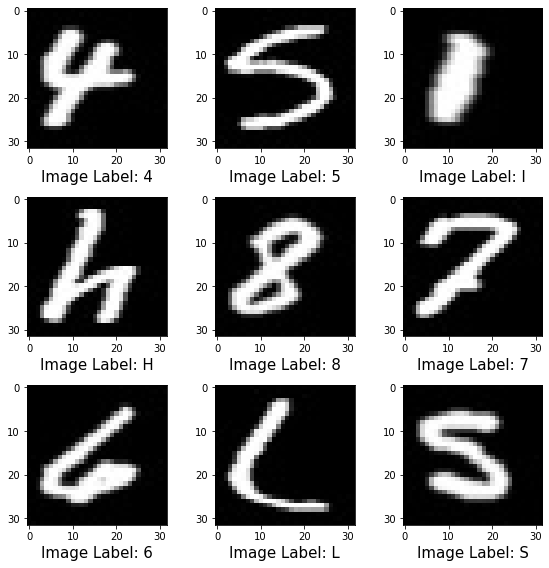

In [73]:
#Let's plot some images to get the idea of what the data actually looks like
#Uncomment the random.seed(13) to pick same random images everytime
#random.seed(13)
IMG_DIM = 32
fig=plt.figure(figsize=(8,8))
row = 3
col = 3
axes = list() 
for i in range(row*col):
    random_index = random.randint(0,18104)
    sample_image = np.array(test_images[random_index][0]).reshape(IMG_DIM, IMG_DIM)
    Label = str(test_labels[test_images[random_index][1]])
    axes.append( fig.add_subplot(row, col, i+1) )
    x_label=("Image Label: "+Label)
    axes[-1].set_xlabel(x_label, fontsize=15)  
    plt.imshow(Img.fromarray(sample_image))
fig.tight_layout()   

In [74]:
#Okay, Let's split the data into train_variable and target_variable
#Train_varaible is going to be input image and target_variable is the image label
test_variable = test_images[:,0]
target_variable_for_testing = test_images[:,1]

In [85]:
start_time =time.time()
test_variable_reshaped = [x for x in test_variable]
test_variable_reshaped = np.reshape(test_variable_reshaped, newshape=(-1, 32, 32, 1))
#The pixel values contained in train_variable for eachc image ranges [0,255]
#We need to normalize it to the range [0,1] as a part of preprocessing
test_variable_reshaped = np.around(test_variable_reshaped/255, 4)
#Next we're going to convert each from 1D array of size 1024 to 2D array of size 32X32 (Remember:32*32=1024)
#Since we're going  to implement convolutional neural network, each of the input data needs to be 2D
#The pixel values contained in train_variable for eachc image ranges [0,255]
#We need to normalize it to the range [0,1] as a part of preprocessing
target_variable_for_testing = np.array(target_variable_for_testing)

In [95]:
#target_variable_for_testing = np.ndarray.tolist(target_variable_for_testing)
target_variable_for_testing = np.array(target_variable_for_testing)

In [96]:
#Uncomment the lines below if you restarted the kernel after training
#It'll load the model configuration alongwith weights
'''from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix
json_model = open('Trained_Model.json', 'r')
loaded_model_json = json_model.read()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
print("Loading The Trained Weights.")
loaded_model.load_weights("Weights_model.h5")
print("Compiling The Model")
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])'''
test_score, test_accuracy = model.evaluate(test_variable_reshaped, target_variable_for_testing)

566/566 [==============================] - 11s 19ms/step - loss: 0.4010 - accuracy: 0.9339


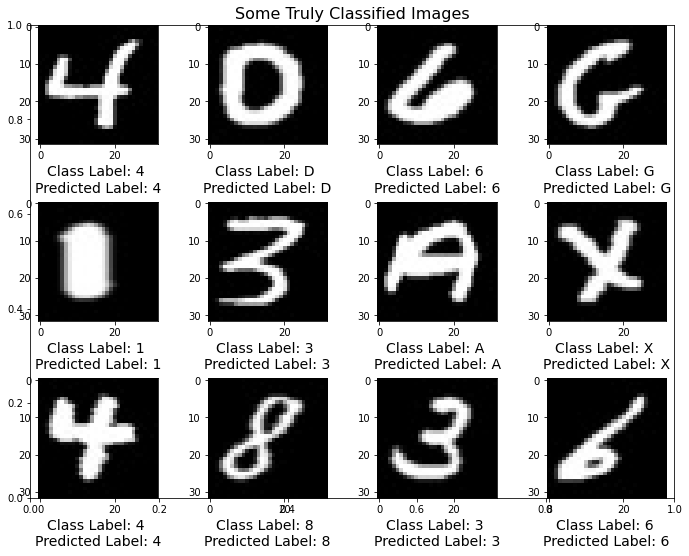

In [111]:
y_prob = model.predict(test_variable_reshaped)
y_classes = y_prob.argmax(axis=-1)
truly_classified = list()
truly_classified_label = list()
miss_classified = list()
miss_classified_label = list()
miss_classified_label_true = list()
for i in range(len(y_classes)):
    if y_classes[i] == target_variable_for_testing[i]:
        truly_classified.append(test_variable_reshaped[i])
        truly_classified_label.append(target_variable_for_testing[i])
        if len(truly_classified) >= 12:
                break
for i in range(len(y_classes)):
    if y_classes[i] != target_variable_for_testing[i]:
        miss_classified.append(test_variable_reshaped[i])
        miss_classified_label.append(y_classes[i])
        miss_classified_label_true.append((target_variable_for_testing[i]))
        if len(miss_classified) >= 12:
            break

    
fig=plt.figure(figsize=(10,8))
plt.title("Some Truly Classified Images", fontsize=16)
row = 3
col = 4
axes = list() 
for i in range(row*col):
    sample_image = np.array(truly_classified[i]).reshape(IMG_DIM, IMG_DIM)*255
    axes.append( fig.add_subplot(row, col, i+1) )
    x_label="Class Label: {} \nPredicted Label: {}".format(test_labels[truly_classified_label[i]], 
                                                           test_labels[truly_classified_label[i]])
    axes[-1].set_xlabel(x_label, fontsize=14)  
    plt.imshow(Img.fromarray(sample_image))
fig.tight_layout()   

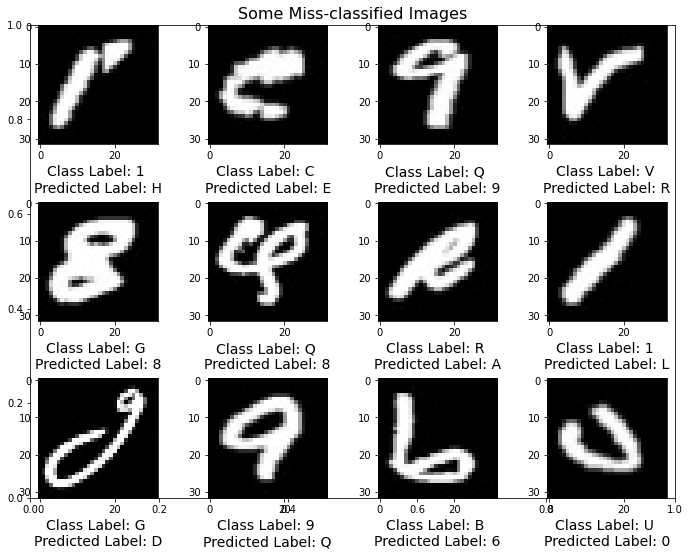

In [112]:
fig=plt.figure(figsize=(10,8))
plt.title("Some Miss-classified Images", fontsize=16)
row = 3
col = 4
axes = list() 
for i in range(row*col):
    sample_image = np.array(miss_classified[i]).reshape(IMG_DIM, IMG_DIM)*255
    axes.append( fig.add_subplot(row, col, i+1) )
    x_label="Class Label: {} \nPredicted Label: {}".format(test_labels[miss_classified_label_true[i]], 
                                                           test_labels[miss_classified_label[i]])
    axes[-1].set_xlabel(x_label, fontsize=14)  
    plt.imshow(Img.fromarray(sample_image))
fig.tight_layout()   

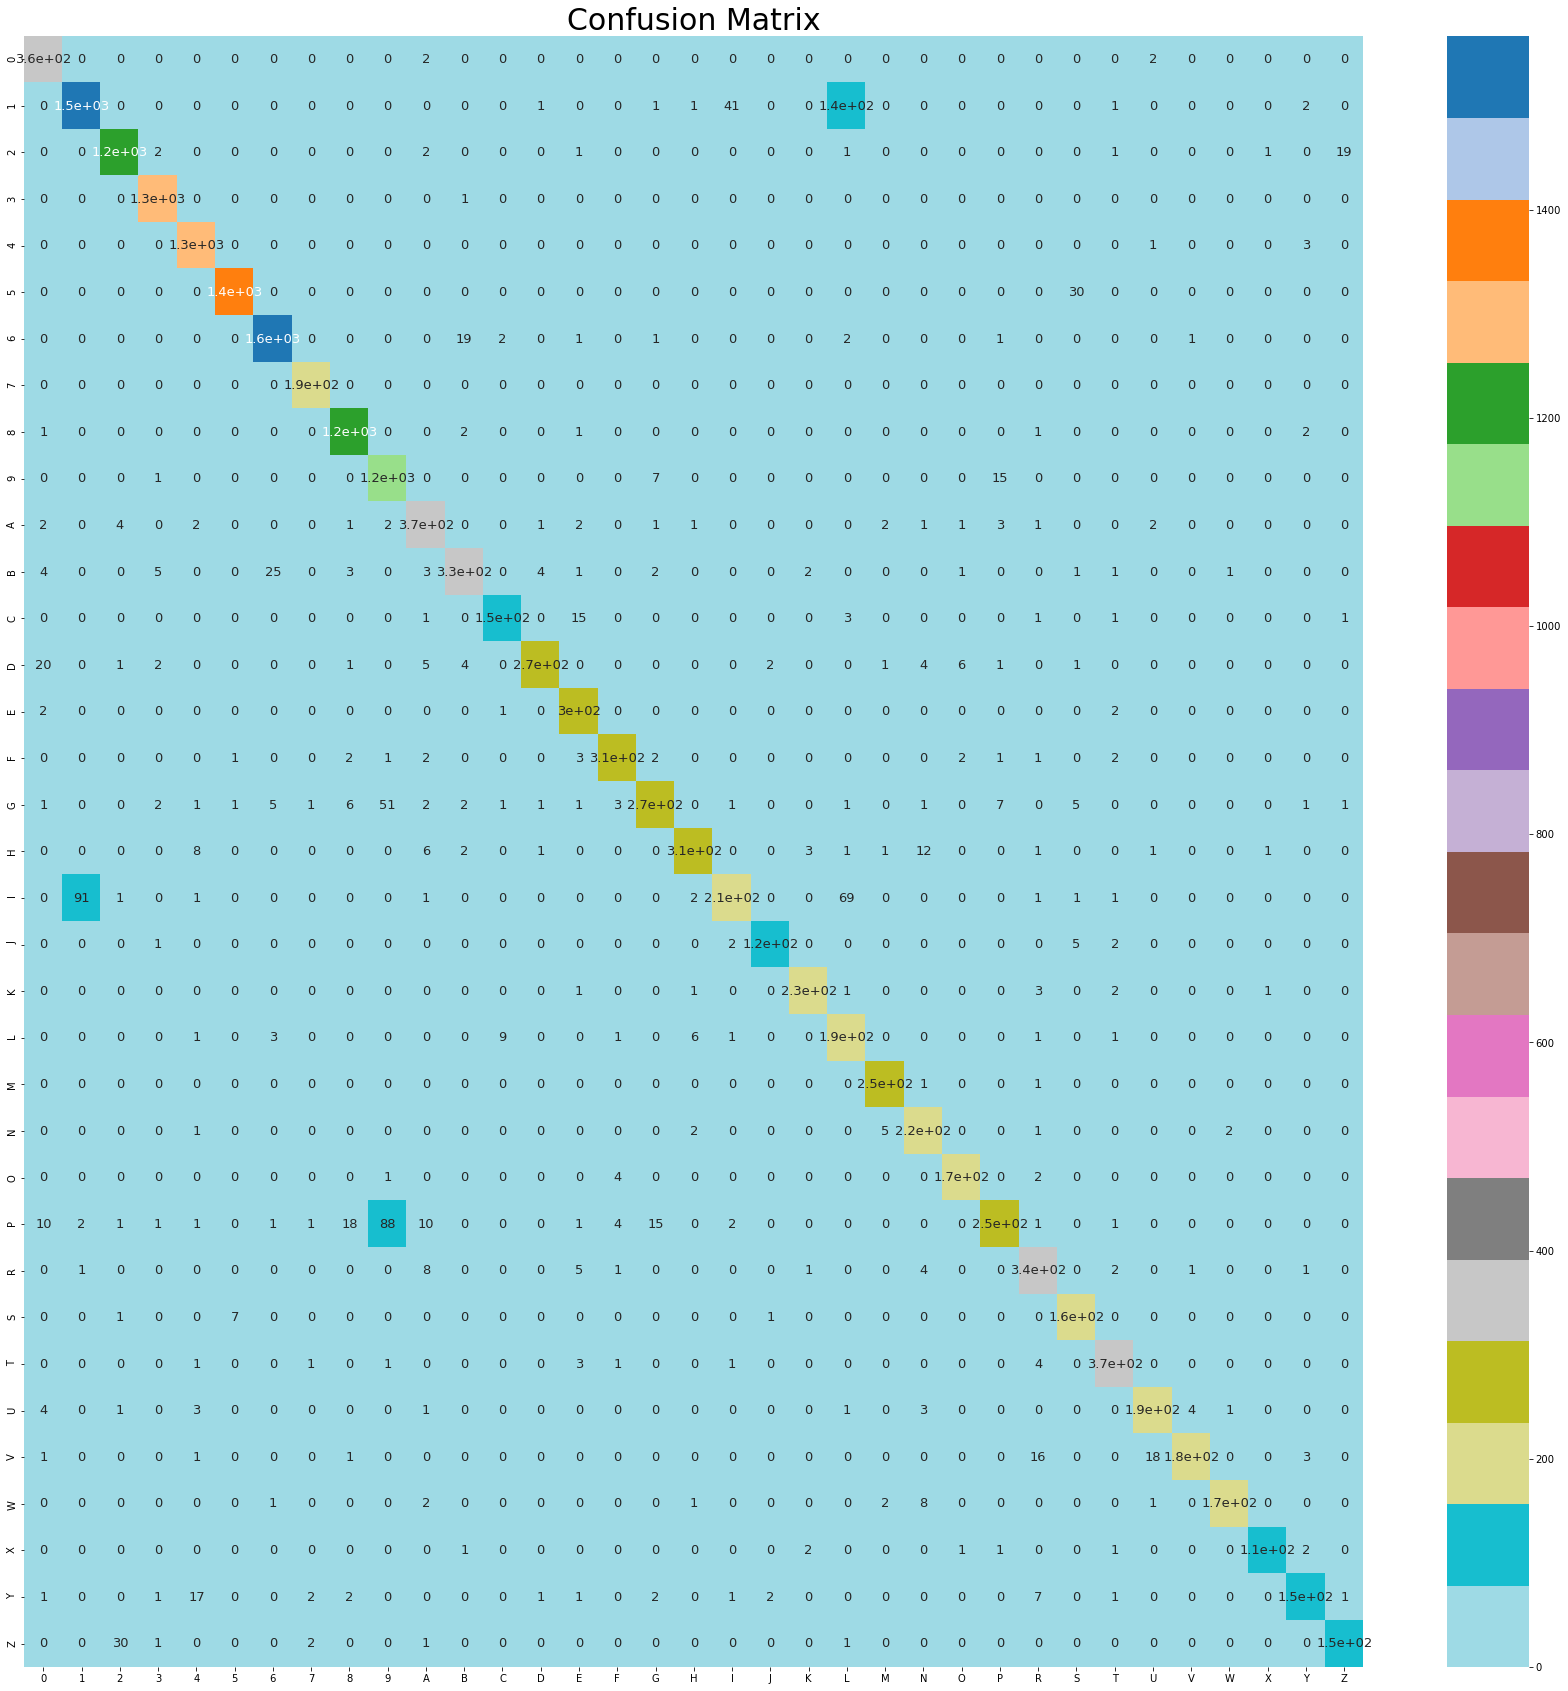

In [153]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm = confusion_matrix(target_variable_for_testing, y_classes)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDEFGHIJKLMNOPRSTUVWXYZ"],
                     columns = [i for i in "0123456789ABCDEFGHIJKLMNOPRSTUVWXYZ"])
plt.figure(figsize=(30, 30))
plt.title("Confusion Matrix", fontsize=30)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}, cmap='tab20_r')

In [157]:
#So Far, We did some preprocessing on train and test data
#We trained the model and tested it using those data
#Let's now try using our own data
#I've drawn some characters using the painting application and now I'm going to use them to see how the model works!!
#Let's First Read them
path = 'H:/G Drive 34GB/MajorProject/DataSet/SampleData/*.jpg'
sample_images = list()
for filename in glob.glob(path):
    im = Img.open(filename)
    temp = np.array(list(im.getdata()))
    sample_images.append(temp)
len(sample_images)

7

In [158]:
sample_images[0].shape

(160000, 3)